In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import cv2

In [2]:
def fixColor(image):
    return(cv2.cvtColor(image, cv2.cv2.COLOR_BGR2RGB))

In [3]:
label_file = "/cxldata/dlcourse/mask_rcnn_model_data/object_detection_classes_coco.txt"

In [4]:
LABELS = open(label_file).read().strip().split("\n")

In [5]:
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),
                          dtype="uint8")
#2d array

In [6]:
LABELS[:5]

['person', 'bicycle', 'car', 'motorcycle', 'airplane']

In [7]:
weights = "/cxldata/dlcourse/mask_rcnn_model_data/mask_rcnn_frozen_inference_graph.pb"

In [8]:
config = "/cxldata/dlcourse/mask_rcnn_model_data/mask_rcnn_inception_v2_coco_2018_01_28.pbtxt"

In [9]:
net = cv2.dnn.readNetFromTensorflow(weights, config)

In [10]:
img = cv2.imread('/cxldata/dlcourse/mask_rcnn_model_data/dining_table.jpg')

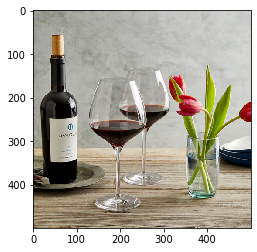

In [11]:
plt.imshow(fixColor(img))

In [12]:
img

array([[[147, 153, 152],
        [140, 148, 147],
        [135, 143, 142],
        ...,
        [209, 210, 206],
        [209, 210, 206],
        [202, 206, 201]],

       [[146, 152, 151],
        [138, 146, 145],
        [130, 141, 139],
        ...,
        [208, 212, 207],
        [208, 212, 207],
        [207, 208, 204]],

       [[144, 152, 151],
        [134, 145, 143],
        [131, 142, 140],
        ...,
        [210, 211, 207],
        [211, 212, 208],
        [208, 212, 207]],

       ...,

       [[ 35,  58,  90],
        [ 22,  49,  83],
        [ 32,  63, 102],
        ...,
        [174, 190, 197],
        [162, 181, 188],
        [180, 196, 203]],

       [[ 60,  90, 119],
        [ 53,  80, 101],
        [ 66,  93, 120],
        ...,
        [136, 154, 161],
        [158, 177, 184],
        [150, 166, 173]],

       [[ 70, 110, 138],
        [ 63,  93, 120],
        [ 66,  96, 123],
        ...,
        [114, 133, 140],
        [144, 156, 162],
        [142, 156, 162]]

In [13]:
blob = cv2.dnn.blobFromImage(img, swapRB=True, crop=False)

In [14]:
net.setInput(blob)

In [15]:
(boxes, masks_polygons) = net.forward(["detection_out_final",
"detection_masks"])

In [16]:
boxes.shape
# points identifying the bounding box

(1, 1, 7, 7)

In [17]:
masks_polygons.shape
# each 100 detection has 90 classes denoted as 15*15 matrix

(100, 90, 15, 15)

Shape of indivisual mask (15, 15)
Mask after resize (328, 148)
Mask after threshold (328, 148)
ROI Shape (12764, 3)
wine glass [156, 21, 112]
Shape of indivisual mask (15, 15)
Mask after resize (154, 81)
Mask after threshold (154, 81)
ROI Shape (6072, 3)
vase [166, 56, 167]
Shape of indivisual mask (15, 15)
Mask after resize (344, 83)
Mask after threshold (344, 83)
ROI Shape (13497, 3)
bottle [209, 226, 77]


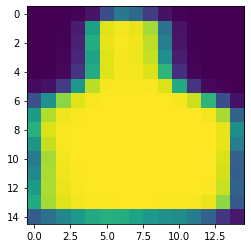

In [24]:
threshold = 0.9

for i in range(0, boxes.shape[2]):
    classID = int(boxes[0, 0, i, 1])
    confidence = boxes[0, 0, i, 2]
    if confidence > threshold:
        (H, W) = img.shape[:2]
        box = boxes[0, 0, i, 3:7] * np.array([W, H, W, H])
        (startX, startY, endX, endY) = box.astype("int")
        boxW = endX - startX
        boxH = endY - startY
        
        mask = masks_polygons[i, classID]
        plt.imshow(mask)
        print("Shape of indivisual mask", mask.shape)
        
        mask = cv2.resize(mask, (boxW, boxH), interpolation=cv2.INTER_CUBIC)
        print("Mask after resize", mask.shape)
        mask = (mask > threshold)
        print("Mask after threshold", mask.shape)
        
        roi = img[startY:endY, startX:endX][mask]
        print("ROI Shape", roi.shape)
        
        color = COLORS[classID]
        blended = ((0.4 * color) + (0.6 * roi)).astype("int8")
        img[startY:endY, startX:endX][mask] = blended
        
        color = COLORS[classID]
        color = [int(c) for c in color]
        print(LABELS[classID], color)
        cv2.rectangle(img, (startX, startY), (endX, endY), color, 2)
        text = "{}: {:.4f}".format(LABELS[classID], confidence)
        cv2.putText(img, text, (startX, startY - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

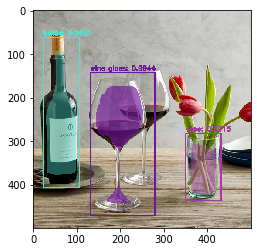

In [25]:
plt.imshow(fixColor(img))